파이썬 머신러닝 완벽가이드 ch4. 6 ~ 7, 10 pg. 227 ~ 251, 278 ~ 289

## 06 XGBoost(eXtra Gradient Boost)


### 01) XGBoost 개요
트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘

[ 장점 ]
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제(Regularization)
- Tree pruning(나무 가지치기) : 이득이 없는 분할 가지치기
- 자체 내장된 교차 검증
- 결손값 자체 처리

### 02) XGBoost 설치하기

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

### 03) 파이썬 래퍼 XGBoost 하이퍼 파라미터

(1) 일반 파라미터

일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터. 디폴트 파라미터 값을 바꾸는 경우는 거의 없음
1. booster
- gbtree(tree based model) 또는 gblinear(linear model) 선택.
- 디폴트는 gbtree
2. silent
- 디폴트는 0, 출력 메세지를 나타내고 싶지 않을 경우 1로 설정
3. nthread
- CPU의 실행 스레드 조정

(2) 부스터 파라미터

트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭. 대부분의 하이퍼 파라미터가 이 곳에 속한다.
1.  eta[default=0.3, alias:learning_rate]:
- GBM의 학습률과 같은 파라미터
- 0에서 1 사이의 값을 지정
- 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값
- 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며 디폴트는 0.1, 보통은 0.01~0.2 사이의 값을 선호

2. num_boost_rounds
- GBM의 n_estimators와 같은 파라미터

3. min_child_weight[default=1]
- 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합
- min_child_weight이 클수록 분할을 자제한다.
- 과적합을 조절하기 위해 사용

4. gamma[default=0, alias:min_split_loss]
- 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
-  해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리
- 값이 클수록 과적합 감소 효과가 있다.

5. max_depth[default=6]
- 트리 기반 알고리즘의 max_depth와 같다.
- 0을 지정하면 깊이에 제한이 없다.
- 값이 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아진다.
- 보통은 3~10 사이의 값 적용

6. sub_sample[default=1]
- GBM의 subsample과 동일
- 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율 지정
- sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용
- 0에서 1 사이의 값이 가능하나 일반적으로 0.5~1 사이의 값 사용

7. colsample_bytree[default=1]
- GBM의 max_features와 유사하다.
- 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용한다.
- 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용

8. alpha[default=0, alias:reg_alpha]
- L1 Regularization 적용 값
- 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.

9. scale_pos_weight[default=1]
- 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터



(3) 학습 태스크 파라미터

학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

1. objective
- 최솟값을 가져야 할 손실 함수를 정의
- XGBoost는 많은 유형의 손실함수를 사용할 수 있다.
- 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐

2. binary:logistic
- 이진 분류일 때 적용

3. multi:softmax
- 다중 분류일 때 적용
- 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 한다.

4. multi:softprob
- multi:softmax와 유사하다.
- 개별 클래스의 해당되는 예측 확률 반환

5. eval_metric
- 검증에 사용되는 함수를 정의
- 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error
- rmse, mae, logloss, error, merror, mlogloss, auc

과적합 문제가 심각할 때
- eta 값 낮춘다.(0.01~0.1). eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여야한다.
- max_depth 값 낮춘다.
- min_child_weight 값 높인다.
- gamma 값 높인다.
- subsample과 colsample_bytree 조정

XGBoost 자체 기능
- 교차 검증, 성능 평가, 피처 중요도
- 조기 중단(Ealry Stopping) : 수행 속도 상향, 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지않고 중지해 수행 시간을 개선할 수 있다.

In [2]:
import xgboost

print(xgboost.__version__)

2.0.0


### 04) 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측


- 종양은 양성 종양과 악성 종양으로 구분된다.
- plot_importance : xgboost 패키지의 피처의 중요도 시각화해주는 모듈
- load_breast_cancer() :사이킷런의 위스콘신 유방암 데이터 세트

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


- 종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로 되어있음.
- 타겟 레이블 값의 종류는 악성이 0, 양성이 1

In [4]:
# 레이블 값의 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [5]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


Dmatrix
- 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 Dmatrix 생성
- 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBOost만의 전용 데이터 세트
- 주요 입력 파라미터 : data, label
- label: 분류-레이블 데이터 세트, 회귀 - 숫자형인 종속값 데이터 세트
- 넘파이 외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환 할 수 있다.

In [6]:
# DMatrix 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [7]:
# 하이퍼 파라미터 설정 - 딕셔너리 형태로 입력
params = { 'max_depth' :3, # 트리 최대 깊이 3
          'eta' :0.1, # 학습률 0.1, XGBClassifier 사용할 경우 eta가 아니라 learning_rate
          'objective' :'binary:logistic', # 이진분류이므로 목적함수는 이진 로지스틱
          'eval_metric' :'logloss', # 오류 함수의 성능 평가 지표 : logloss
          'early_stoppings' :100
}
num_rounds = 400 # 부스팅 반복 횟수는 400회

In [8]:
# 모델 학습

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, \
                      early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.58431	eval-logloss:0.56554
[1]	train-logloss:0.51885	eval-logloss:0.50669
[2]	train-logloss:0.46457	eval-logloss:0.45868
[3]	train-logloss:0.41713	eval-logloss:0.41822
[4]	train-logloss:0.37585	eval-logloss:0.38103
[5]	train-logloss:0.34075	eval-logloss:0.35137
[6]	train-logloss:0.31028	eval-logloss:0.32588
[7]	train-logloss:0.28283	eval-logloss:0.30127
[8]	train-logloss:0.25925	eval-logloss:0.28197
[9]	train-logloss:0.23822	eval-logloss:0.26265
[10]	train-logloss:0.21951	eval-logloss:0.24821
[11]	train-logloss:0.20251	eval-logloss:0.23231
[12]	train-logloss:0.18759	eval-logloss:0.22079
[13]	train-logloss:0.17386	eval-logloss:0.20795
[14]	train-logloss:0.16199	eval-logloss:0.19764
[15]	train-logloss:0.15109	eval-logloss:0.18950
[16]	train-logloss:0.14056	eval-logloss:0.18052
[17]	train-logloss:0.13137	eval-logloss:0.17246
[18]	train-logloss:0.12329	eval-logloss:0.16512
[19]	train-logloss:0.11565	eval-logloss:0.15828
[20]	train-logloss:0.10860	eval-logloss:0.15436
[2

- train()으로 학습을 수행하면 반복시 train-error와 eval-logloss 가 지속적으로 감소한다.


In [9]:
# 테스트 데이터 세트 예측 수행
# 예측 결과 값을 반환하는 사이킷런과 다르게 xgboost의 predict()는 확률 값을 반환한다.

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 에측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.904 0.004 0.908 0.267 0.992 1.    1.    0.999 0.994 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:
# 이전에 정의한 평가 함수
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [11]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,  F1: 0.9744, AUC:0.9951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

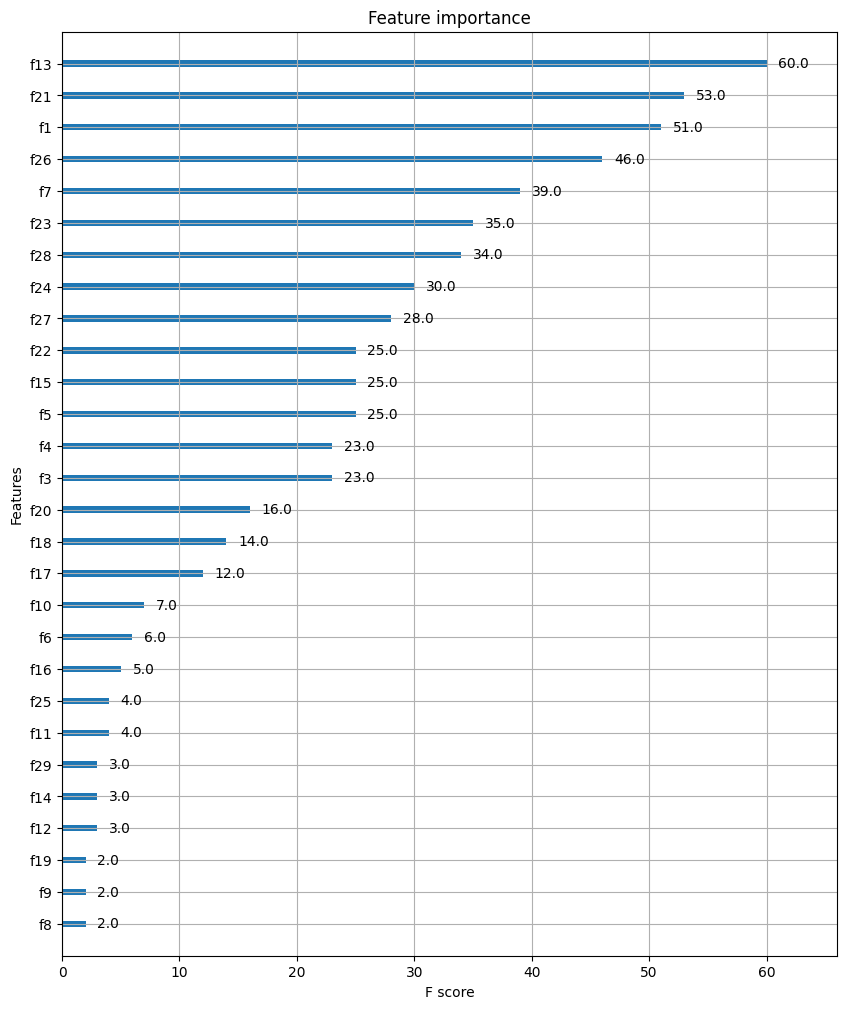

In [12]:
# 내장된 시각화 기능 수행
# plot_importance() : 피처 중요도 시각화
# 파라미터로 앞에 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체를 입력
# 피처 명을 제대로 알 수 없으므로 f자 뒤에 순서를 붙여서 x 축에 피처들로 나열

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

to_graphviz() API
- 결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost에서 시각화 가능
- 파라미터로 학습이 완료된 모델 객체와 Graphviz가 참조할 파일명 입력


cv() API
- 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법
- 반환값은 DataFrame 형태

### 05) 사이킷런 래퍼 XGBoost의 개요 및 적용
1. fit()과 predict()만으로 학습과 예측이 가능
2. 크게 분류하자면
- 분류 : XGBClassifier
- 회귀 : XGBRegressor
3. 하이퍼 파라미터의 차이
- eat -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha

In [13]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9947


In [14]:
# 성능 평가
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9947


조기 중단 수행 가능
- 조기 중단 관련 파라미터를 fit()에 입력
- early_stopping_rounds : 평가 지표가 향상될 수 있는 반복 횟수
- eval_metric : 조기 중단을 위한 평가 지표
- eval_set : 성능 평가 수행할 데이터 세트(학습 데이터가 아닌 별도의 데이터 세트)

In [15]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

In [16]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9947


- 큰 차이 없다.

- 조기 중단값을 너무 급격하게 줄이면 아직 성능이 향상될 여지가 있음에도 불구하고 반복 멈춰버려 예측 성능 저하될 우려가 있다.

In [17]:
 # early_stopping_rounds를 10으로
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

- 예측 정확도는 early_stopping_rounds=100일 때보다 낮음.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

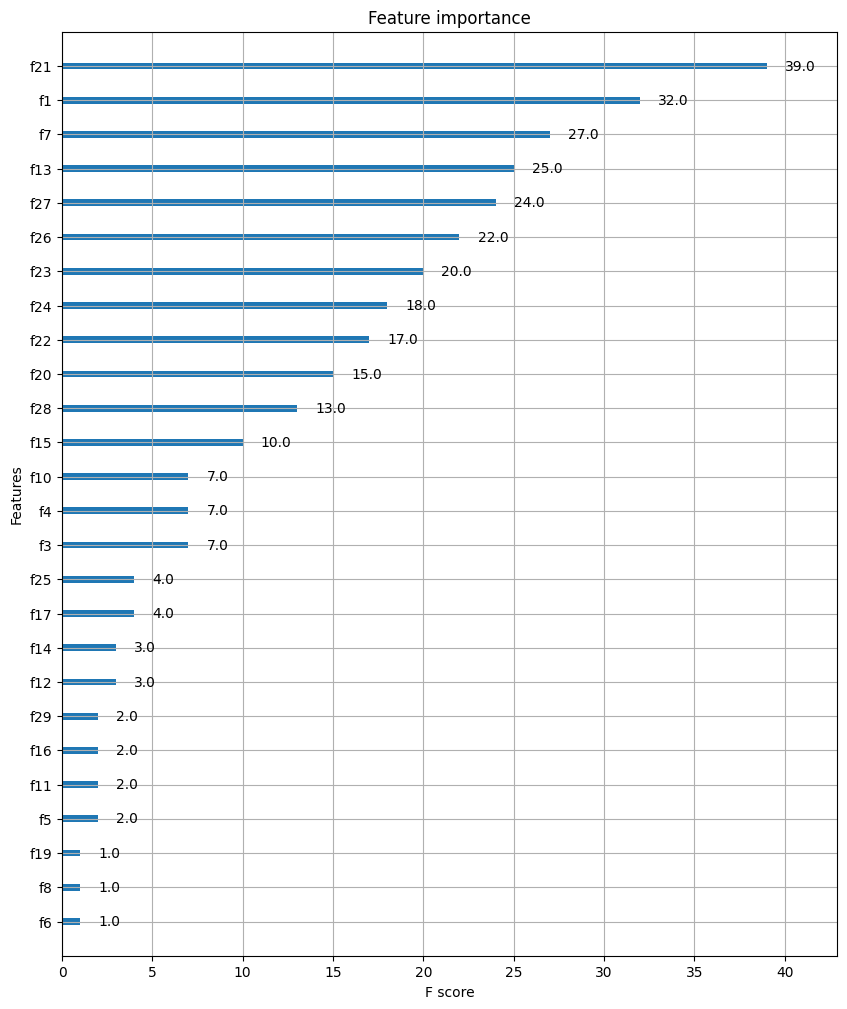

In [18]:
# 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

## 07 LightGBM
- 리프 중심 트리 분할 방식 사용 : 비대칭적인 규칙 트리 생성, 예측 오류 손실 최소화 가능
- 대부분의 트리 기반의 알고리즘은 균형 트리 분할 방식 사용 : 오버피팅에 강하다.
- 장점 : 빠른 학습과 예측 수행 시간, 더 작은 메모리 사용량, 카테고리형 피처의 자동 변환과 최적 분할(원-핫인코딩 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)
- 단점 : 작은 데이터 세트에서 과적합이 바생하기 쉬움.


### 01) LightGBM 하이퍼 파라미터
리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 트리 특성에 맞는 하이퍼 파라미터 설정이 필요하다.


(1) 주요 파라미터
1. num_iterations[default=100]
- 반복 수행하려는 트리의 개수 지정
- 크게 지정할수록 예측 성능이 높아질 수 있으나 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있다.
- 사이킷런 호환 클래스에서는 n_estimators 로 이름 변경

2. learning_rate[default=0.1]
- 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값
- 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 마찬가지로 과적합 이슈와 학습 시간이 길어지는 부정적인 영향도 고려해야한다.
- GBM, XGBoost의 learning_rate와 같은 파라미터

3. max_depth[default=-1]
- 트리 기반 알고리즘의 max_depth와 같다.
- 0보다 작은 값을 지정하면 깊이에 제한이 없다.
- 지금까지 소개한 Depth wise 방식의 트리와 다르게 LightGBM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊다.

4. min_data_in_leaf[default=20]:
- 결정 트리의 min_samples_leaf와 같은 파라미터
- 하지만 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 min_child_samples 파라미터로 이름 변경
- 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수
- 과적합을 제어하기 위한 파라미터임

5. num_leaves[default=31]
- 하나의 트리가 가질 수 있는 최대 리프 개수

6. boosting[default=gbdt]
- 부스팅의 트리를 생성하는 알고리즘을 기술
- gdbt : 일반적인 그래디언트 부스팅 결정 트리
- rf : 랜덤 포레스트

7. bagging_fraction[default=1.0]
- 트리가 커져서 과적하보디는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정
- 사이킷런의 GBM과 XGBVlassifier의 subsample 파라미터와 동일하기에 사이킷런 래퍼 LightGBM인 LightGBMClassifier에서는 subsample로 동일하게 파라미터 이름이 변경

8. feature_fraction[default=1.0]
- 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
- 과적합을 막기 위해 사용됨
- GBM의 max_features와 유사하며, XGBClassifier의 colsample_bytree와 똑같으므로 LightGBMClassifier에서는 동일하게 colsample_bytree로 변경됨

9. lambda_l2[default=0.0]
- L2 regulation 제어를 위한 값
- 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음
- XGBClassifier의 reg_lambda와 동일하므로 LightGBMClassifier에서는 reg_lambda로 변경됨

10. lambda_l1[default=0.0]
- L1 regulation 제어를 위한 값
- L2와 마찬가지로 과적합 제어를 위한 것
- XGBClassifier의 reg_alpha와 동일하므로 LightGBMClassifier에서는 reg_alpha로 변경됨



(2) Learning Task 파라미터
1. objective
- 최솟값을 가져야 할 손실 함수 정의
- Xgboost의 objective 파라미터와 동일
- 애플리케이션 유형에 따라서 objective인 손실 함수가 지정

### 02) 하이퍼 파라미터 튜닝 방안
- num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth 함께 조정하면서 모델의 복잡도 줄이는 것
- learning_rate 작게 하면서 n_estimators 크게 하는 것
- 과적합 제어 위해 reg_lambda, reg_alpha와 같은 regularization 적용
- 학습 데이터에 사용할 피처의 개수나 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터 적용

### 03) LigthGBM 적용 - 위스콘신 유방암 예측

fit()에 파라미터 설정을 통해 조기 중단 가능

아래 코드들은 오류로 돌아가지 않음.

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test , y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LigthGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

In [ ]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)


## 10 스태킹 앙상블

1. 배깅과 부스팅과 공통점
> 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점

2. 차이점
> 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것.
>-  즉 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행. (메타 모델이라고 함)

두 종류의 모델이 필요하다.
> 1. 개별적인 기반 모델
> 2. 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델

 스태킹 모델의 핵심 : 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것.

 스태킹은 높은 순위를 차지하기 위해 조금이라도 성능 수치를 높여야 할 경우에 자주 사용



여러 개의 모델에 대한 예측값을 합한 후, 즉 스태킹 형태로 쌓은 뒤 이에 대한 예측을 다시 수행


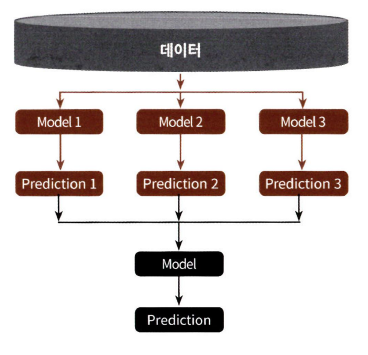

예시

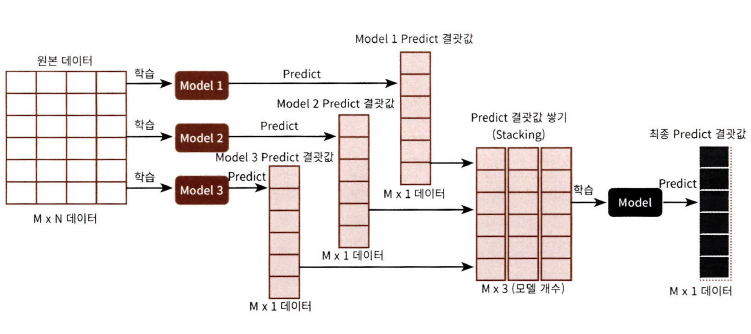

### 기본 스태킹 모델

In [25]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [26]:
#  스태킹에 사용될 머신러닝 알고리즘 클래스 생성

# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

In [27]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [28]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [29]:
# 예측 값을 칼럼 레벨 ㅕㅍ으로 붙여서 피처 값으로 만들어 학습 데이터로 다시 사용
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [30]:
# 최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도 측정
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9649


- 정확도가 향상되었다.

### CV 세트 기반의 스태킹
과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트 이용


1. 스텝 1
- 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터 생성
2. 스텝 2
- 스텝 1에서 개별 모델들이 생성한 학습용/테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습/예측할 최종 학습용/테스트 데이터 세트 생성
- 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터 기반으로 학습
- 최종적으로 생성된 테스트 데이터 세트 예측
원본 테스트 데이터의 레이블 데이터 기반으로 평가

(1) 스텝 1 : 개별 모델이 메타 모델을 위한 학습용 데이터와 테스트 데이터 생성

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 학습할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,' model 시작 ')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, ' 시작 ')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [32]:
# 각 모델별로 get_stacking_base_datasets()함수 호출해 각각 메타 모델이 사용할 학습용, 테스트용 데이터 세트 반환
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


(2) 스텝 2 : 각 모델별 학습 데이터와 테스트 데이터 합치기 - 넘파이의 concatenate() 이용

In [33]:
# 메타 모델이 학습할 학습용 피처 데이터 세트
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
# 메타 모델이 예측할 테스트용 피처 데이터 세트
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:',Stack_final_X_train.shape,
      '스태킹 테스트 피어 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피어 데이터 Shape: (114, 4)


- 4개의 개별 모델 예측값을 합친 것이므로 칼럼 크기는 4

(3) 정확도 측정
- 최종 메타 모델 : 로지스틱 회귀
- 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습 후에 스태킹된 테스트 데이터 세트로 예측하고, 예측 결과를 원본 테스트 레이블 데이터와 비교하여 정확도 측정

In [34]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


파라미터 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적이다.


## 11 정리


- 앙상블
> 결정 트리 기반의 다수의 약한 학습기를 결합해 변동성을 줄여 예측 오류 줄이고 성능 개선

- 결정 트리 알고리즘
> 정보의 균일도에 기반한 규칙 트리를 만들어서 예측을 수행한다. 다른 알고리즘에 직관적이라 예측 결과 도출 과정을 쉽게 알 수 있다. 단점은 과적합이 쉽게 발생하는 것이다.

- 앙상블은 대표적으로 배깅과 부스팅으로 구분
- 배깅
> 학습 데이터를 중복 허용하면서 다수의 세트로 샘플링하여 이를 다수의 약한 학습기가 학습한 뒤 최종 결과 결합해 예측하는 방식
> - 랜덤 포레스트

- 부스팅
> 학습기들이 순차적으로 학습 진행하면서 예측 틀린 데이터에 대해서는 가중치 부여해 다음번 학습기가 학습할 때 이전에 예측이 틀린 데이터에 대해서는 보다 높은 정확도로 예측할 수 있도록 한다.
> - GBM : 뛰어난 성능, 수행시간 오래 걸림.
> - XGBoost와 LightGBM

- 스태킹
> 여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트 재생성하는 기법
> - 핵심 : 메타 모델이 사용할 학습 데이터 세트와 예측 데이서 세트를 개별 모델의 예측 값들을 스태킹 형태로 결합해 생성하는데 있다.